<a href="https://colab.research.google.com/github/Arbarbn/Recommendation-System-Projects-using-python/blob/main/Location_Recommendation_using_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement** : 
1.   How to get recommend close popular restaurant?
3.   How to get restaurant based on time? 
4.   How to get location based on business categories?
5.   How to get location based on attributes?

This dataset is a subset of Yelp's businesses. In the most recent dataset you'll find information about businesses across 8 metropolitan areas in the USA and Canada.

In [ ]:
!pip install plotly_express

In [ ]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 17.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1623235 sha256=0511dc37977cc9d5ed9e437a33e96f61b7ff288948be666dc631fd58221a62f6
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


# HOME

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import surprise
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise import KNNBasic

import plotly_express as px
from sklearn.cluster import KMeans

Restaurants

In [ ]:
df = pd.read_json('/content/drive/MyDrive/Data Scientist/Project/Recommendation System/Restaurant+Rec+-+Code/yelp_academic_dataset_business.json', lines=True)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [ ]:
def search_categories(label):
  return df[df['categories'].str.contains(label)==True]

In [ ]:
df_restaurants = search_categories('Restaurants').append(search_categories('Food')).drop_duplicates(subset=['name', 'address'])
df_restaurants.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
7,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,11,1,None,"Breakfast & Brunch, Restaurants","{'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}"
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [ ]:
print("There are", df_restaurants.shape[0], "restaurants")

There are 63824 restaurants


In [ ]:
px.set_mapbox_access_token('pk.eyJ1IjoiYXJiYXJibiIsImEiOiJja3lzN2preWMxMTBoMnlxdGlkMmZkYnA2In0.DABXvuzvdcER2ti6wMnlzw')
px.scatter_mapbox(df_restaurants, lat="latitude", lon="longitude", color="stars", size="review_count", size_max=30, zoom =4, width=1200, height=800)

Review Stars of Restaurants

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Review Stars of Restaurants')

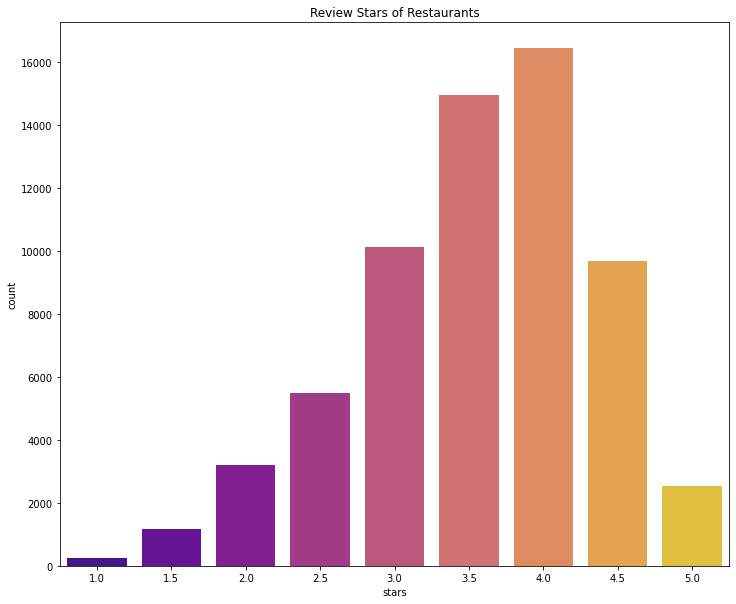

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(df_restaurants['stars'], ax=ax, palette='plasma')
plt.title('Review Stars of Restaurants')

Most of restaurants have 4 stars, where this means good.

In [ ]:
top_restaurants = df_restaurants[df_restaurants['stars']>=4.5].sort_values(by=['review_count','stars'], ascending=False)[:20]
top_restaurants[['name','review_count','stars']]

,name,review_count,stars
42375,Screen Door,7219,4.5
145385,Neptune Oyster,5115,4.5
46678,Franklin Barbecue,4942,4.5
24869,Moonshine Patio Bar & Grill,4833,4.5
122853,Mother’s Bistro & Bar,4466,4.5
27556,Powell's City of Books,4295,5.0
156929,Tasty n Alder,3875,4.5
36743,Fox Bros. Bar-B-Q,3825,4.5
61428,Home Slice Pizza,3776,4.5
106500,Atlanta Breakfast Club,3761,4.5


Text(0.5, 1.0, 'Top 20 Restaurants with stars higher than 4.5')

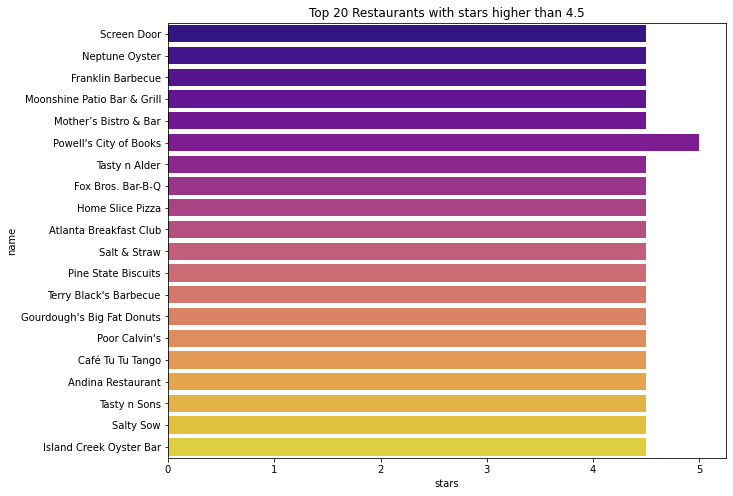

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=top_restaurants, x='stars', y='name', palette='plasma', ax=ax)
plt.title('Top 20 Restaurants with stars higher than 4.5')

In [ ]:
px.scatter_mapbox(top_restaurants, lat="latitude", lon="longitude", color="stars", size="review_count", size_max=30, zoom =4, width=1200, height=800)

The city with highest top 20 are Portland.

K-Means Clustering

In [ ]:
#Elbow to determine K
Portland = df_restaurants[df_restaurants.state=="OR"]
location = Portland[['longitude', 'latitude']]
dist = []

number=range(1,20)
for k in number:
  model = KMeans(n_clusters=k)
  model.fit(location)
  dist.append(model.inertia_)

Text(0.5, 1.0, 'Elbow method')

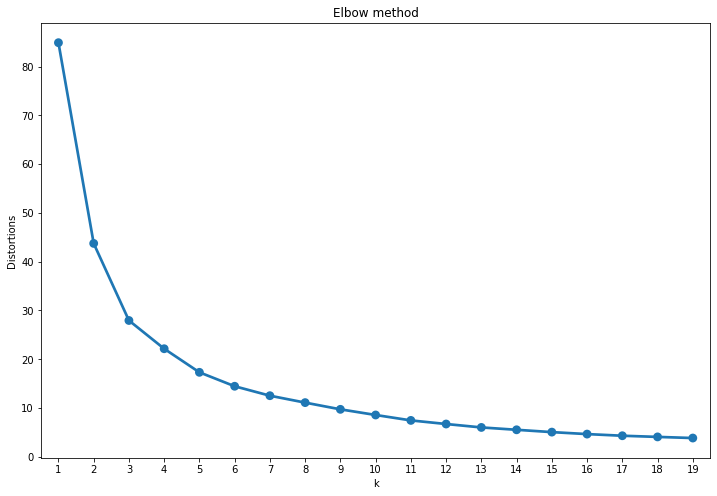

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.pointplot(x=list(number), y=dist, ax=ax)
ax.set_xlabel('k')
ax.set_ylabel('Distortions')
ax.set_title('Elbow method')

In [ ]:
model = KMeans(n_clusters=6)
model.fit(location)

Portland['cluster'] = model.predict(Portland[["longitude", "latitude"]])
Portland.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,cluster
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",5
36,jx91IMdGOmLOo8h_F9z39g,Cleary's Restaurant & Spirits,12429 NE Glisan St,Portland,OR,97230,45.526473,-122.535323,3.5,19,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Nightlife, Sandwiches, Seafood, Restaurants","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",5
50,5PsApTz-WqhF_-8mfqGtGw,Cafe Yumm!,301 SW Morrison St,Portland,OR,97204,45.518450,-122.675723,3.5,158,1,"{'OutdoorSeating': 'True', 'GoodForKids': 'Tru...","Vegetarian, Vegan, Sandwiches, Soup, American ...","{'Monday': '10:0-17:0', 'Tuesday': '10:0-17:0'...",2
93,HMXiuCxHDXqMH1hBpaHd9g,Whole Time Chicken,,Portland,OR,97215,45.516241,-122.597527,5.0,7,0,"{'OutdoorSeating': 'True', 'RestaurantsTableSe...","Food Stands, Restaurants, Sandwiches","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",0
94,ZA3u0Nu5V6TqkcYh8U0zdg,B Street Coffee House,2190 W Burnside St,Portland,OR,97210,45.523074,-122.696206,4.5,131,0,"{'Caters': 'False', 'RestaurantsAttire': 'u'ca...","Restaurants, Food, Sandwiches, Breakfast & Bru...","{'Monday': '6:30-15:0', 'Tuesday': '6:30-15:0'...",2


In [ ]:
  px.scatter_mapbox(Portland, lat="latitude", lon="longitude", color="cluster", size="review_count", size_max=30, zoom=10, width=1200, height=800)

We should save by own cluster per state, so we can choose different state. As example, we only use Portland as sample of recommendation. 

#Knowledge-based Recommendation

In [ ]:
def recommendation(city, business=None, longitude=None, latitude=None, attribute=None, stars=None, is_open=None, day=None):
  city = df[df.city==city]
  
  if (business != None) and (longitude==None) and (latitude==None) and (attribute==None) and (stars==None) and (is_open==None) and (day==None):
    print('Business')
    df_business = city[city.categories.str.contains(business)==True]
    C = df_business['stars'].mean()
    m = df_business['review_count'].quantile(0.8)
    #Take with minimum number of review count
    q_top = df_business.copy().loc[(df_business['review_count']>m)]
    #Weighted ratings 
    q_top['score'] = q_top.apply(lambda x: ((x['review_count']*x['stars'])/(x['review_count']+m))+((m*C)/(m+x['review_count'])), axis=1)
    #Top 5 Recommendation based location and stars
    q_top = q_top.sort_values(by=['score'], ascending=False)[:5]
    return q_top[['city', 'name', 'stars', 'review_count', 'categories', 'score']].reset_index(drop=True)
  
  elif stars != None and is_open != None and day==None:
    print('Stars, open')
    C = city['stars'].mean()
    m = city['review_count'].quantile(0.8)
    #Take with minimum number of review count
    q_top = city.copy().loc[(city['review_count']>m) & (city.stars == stars) & (city.is_open == is_open)]
    #Weighted ratings 
    q_top['score'] = q_top.apply(lambda x: ((x['review_count']*x['stars'])/(x['review_count']+m))+((m*C)/(m+x['review_count'])), axis=1)
    #Top 5 Recommendation based location and stars
    q_top = q_top.sort_values(by=['score'], ascending=False)[:5]
    return q_top[['city', 'name', 'stars', 'review_count', 'categories', 'is_open', 'score']].reset_index(drop=True)
  
  elif latitude != None and longitude != None :
    print('Longitude, Latitude')
    model = KMeans(n_clusters=6)
    model.fit(city[["longitude", "latitude"]].values)
    city['cluster'] = model.predict(city[["longitude", "latitude"]].values)
    cluster = model.predict(np.array([longitude, latitude]).reshape(1,-1))[0]

    C = city['stars'].mean()
    m = city['review_count'].quantile(0.8)
    #Take with minimum number of review count
    q_top = city.copy().loc[(city['review_count']>m) & (city.cluster==cluster)]
    #Weighted ratings 
    q_top['score'] = q_top.apply(lambda x: ((x['review_count']*x['stars'])/(x['review_count']+m))+((m*C)/(m+x['review_count'])), axis=1)
    #Top 5 Recommendation based location and stars
    q_top = q_top.sort_values(by=['score'], ascending=False)[:5]
    return q_top[['city', 'name', 'stars', 'review_count', 'longitude', 'latitude', 'categories','cluster', 'score']].reset_index(drop=True)

  elif (day != None) and (stars != None) and (is_open != None) :
    print('Business, day, stars, open')
    df_business = city[city.categories.str.contains(business)==True].reset_index(drop=True)
    df_hour = df_business['hours'].apply(pd.Series)
    is_day = df_hour[day].isnull() #Check the bussiness are open

    C = df_business['stars'].mean()
    m = df_business['review_count'].quantile(0.8)

    #index of day
    hour_idx = df_hour.index[is_day==False].tolist()

    q_top = df_business.copy().iloc[hour_idx].loc[(df_business['review_count']>m) & (df_business.stars==stars) & (df_business.is_open==is_open)]
    #Weighted ratings 
    q_top['score'] = q_top.apply(lambda x: ((x['review_count']*x['stars'])/(x['review_count']+m))+((m*C)/(m+x['review_count'])), axis=1)
    #Top 5 Recommendation based location and stars
    q_top = q_top.sort_values(by=['score'], ascending=False)[:5]
    return q_top[['city', 'name', 'stars', 'review_count', 'categories', 'hours', 'is_open', 'score']].reset_index(drop=True)

  elif (attribute != None) :
    print('Attribute, business')
    df_business = city[city.categories.str.contains(business)==True].reset_index(drop=True)
    df_attributes = df_business['attributes'].apply(pd.Series)
    # As example only WiFi
    df_business[attribute] = df_attributes[attribute].map(lambda x: 'Paid' if x in np.array(["'paid'", "u'paid'"]) else ('Free' if x in np.array(["'free'", "u'free'"]) else 'No'))

    C = df_business['stars'].mean()
    m = df_business['review_count'].quantile(0.8)
    #Take with minimum number of review count
    attr_idx = df_business.index[((df_business[attribute] == 'Free') | (df_business[attribute] == 'Paid'))].tolist()
  
    q_top = df_business.copy().iloc[attr_idx].loc[(df_business['review_count']>m)]
    #Weighted ratings 
    q_top['score'] = q_top.apply(lambda x: ((x['review_count']*x['stars'])/(x['review_count']+m))+((m*C)/(m+x['review_count'])), axis=1)
    #Top 5 Recommendation based location and stars
    q_top = q_top.sort_values(by=['score'], ascending=False)[:5]
    return q_top[['city', 'name', 'stars', 'review_count', 'categories', attribute, 'score']].reset_index(drop=True)
  
  elif (attribute==None) and (day==None):
    print('City')
    C = city['stars'].mean()
    m = city['review_count'].quantile(0.8)
    #Take with minimum number of review count
    q_top = city.copy().loc[(city['review_count']>m)]
    #Weighted ratings 
    q_top['score'] = q_top.apply(lambda x: ((x['review_count']*x['stars'])/(x['review_count']+m))+((m*C)/(m+x['review_count'])), axis=1)
    #Top 5 Recommendation based location and stars
    q_top = q_top.sort_values(by=['score'], ascending=False)[:5]
    return q_top[['city', 'name', 'stars', 'review_count', 'categories', 'score']].reset_index(drop=True)

Business Location recommendation in Portland

In [ ]:
recommendation(city='Portland')

City


,city,name,stars,review_count,categories,score
0,Portland,Powell's City of Books,5.0,4295,"Food, Airports, Bookstores, Flowers & Gifts, C...",4.983154
1,Portland,Ovation Coffee & Tea,5.0,740,"Cafes, Gluten-Free, Breakfast & Brunch, Restau...",4.909036
2,Portland,Pedal Bike Tours,5.0,736,"Hotels & Travel, Tours, Bike Rentals, Historic...",4.908583
3,Portland,Swiss Hibiscus,5.0,510,"Fondue, German, Modern European, Restaurants",4.872839
4,Portland,Tōv,5.0,503,"Restaurants, Coffee & Tea, Food, Egyptian, Mid...",4.871280


In [ ]:
recommendation(city='Portland', business= 'Pizza')

Business


,city,name,stars,review_count,categories,score
0,Portland,Gumba,5.0,298,"Noodles, American (New), Food Trucks, Southern...",4.506196
1,Portland,a Cena Ristorante,4.5,759,"Italian, Restaurants, Pizza",4.342523
2,Portland,Ken's Artisan Bakery,4.5,755,"Food, Bakeries, Restaurants, Coffee & Tea, San...",4.341841
3,Portland,Life of Pie Pizza,4.5,728,"Restaurants, Asian Fusion, Breakfast & Brunch,...",4.337079
4,Portland,Elephants Delicatessen,4.5,704,"Soup, Comfort Food, Specialty Food, Bars, Amer...",4.332599


In [ ]:
recommendation(city='Portland', stars = 4.0, is_open=1)

Stars, open


,city,name,stars,review_count,categories,is_open,score
0,Portland,Luc Lac,4.0,3199,"Bars, Tapas/Small Plates, Lounges, Nightlife, ...",1,3.998317
1,Portland,Deschutes Brewery Portland Public House,4.0,3100,"Restaurants, Sandwiches, Pubs, American (New),...",1,3.998264
2,Portland,Portland City Grill,4.0,2885,"Asian Fusion, Restaurants, American (Tradition...",1,3.998138
3,Portland,Voodoo Doughnut - Davis,4.0,1960,"Food, Donuts, Bakeries, Wedding Chapels, Event...",1,3.997289
4,Portland,Tin Shed Garden Cafe,4.0,1736,"Breakfast & Brunch, Gluten-Free, Beer, Wine & ...",1,3.996952


In [ ]:
recommendation(city='Portland', latitude = 45.52,	longitude= -122.28)

Longitude, Latitude


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,city,name,stars,review_count,longitude,latitude,categories,cluster,score
0,Portland,Atomic Auto,5.0,283,-122.557627,45.527226,"Auto Repair, Automotive, Car Dealers, Tires",0,4.790601
1,Portland,La Parrilla Kitchen,5.0,178,-122.578577,45.546157,"Mexican, Restaurants",0,4.701224
2,Portland,Lovely Tire & Wheel Company,5.0,120,-122.578398,45.512272,"Automotive, Tires",0,4.609049
3,Portland,The Furniture Shack,5.0,105,-122.526988,45.562012,"Mattresses, Home Decor, Furniture Stores, Rugs...",0,4.575151
4,Portland,Tyson Whiteside Audio Video,5.0,93,-122.552248,45.551736,"Television Service Providers, Home Theatre Ins...",0,4.543485


In [ ]:
recommendation(city='Portland', attribute='WiFi', business='Restaurants')

Attribute, business


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,city,name,stars,review_count,categories,WiFi,score
0,Portland,Ovation Coffee & Tea,5.0,740,"Cafes, Gluten-Free, Breakfast & Brunch, Restau...",Free,4.778555
1,Portland,Tōv,5.0,503,"Restaurants, Coffee & Tea, Food, Egyptian, Mid...",Free,4.700804
2,Portland,Gumba,5.0,298,"Noodles, American (New), Food Trucks, Southern...",Free,4.570303
3,Portland,Kasbah Moroccan Cafe,5.0,273,"Cafes, Restaurants, African, Mediterranean, Fo...",Free,4.546163
4,Portland,Mother’s Bistro & Bar,4.5,4466,"American (Traditional), Restaurants, Bars, Nig...",Free,4.474998


Most of top Restaurants has Free WiFi as their facilities

In [ ]:
recommendation(city='Portland', business='Fashion', day='Monday', is_open=1, stars=4.5)

Business, day, stars, open


,city,name,stars,review_count,categories,hours,is_open,score
0,Portland,Brides for a Cause,4.5,258,"Shopping, Local Services, Women's Clothing, Fa...","{'Monday': '10:0-16:0', 'Tuesday': '10:0-16:0'...",1,4.417900
1,Portland,The White Dress,4.5,233,"Fashion, Accessories, Bridal, Shopping","{'Monday': '11:0-19:0', 'Thursday': '11:0-19:0...",1,4.410382
2,Portland,The Pencil Test,4.5,191,"Fashion, Lingerie, Shopping","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",1,4.394088
3,Portland,Sock Dreams,4.5,189,"Fashion, Accessories, Shopping","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",1,4.393163
4,Portland,Presents of Mind,4.5,157,"Fashion, Home & Garden, Women's Clothing, Shop...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",1,4.375808


Open dataset

In [7]:
df_review = pd.read_csv('/content/drive/MyDrive/Data Scientist/Project/Recommendation System/Restaurant+Rec+-+Code/yelp_review.csv', low_memory=True, usecols=['business_id', 'stars', 'text'])
df_business = pd.read_csv('/content/drive/MyDrive/Data Scientist/Project/Recommendation System/Restaurant+Rec+-+Code/yelp_business.csv', low_memory=True)

In [ ]:
df_user = pd.read_csv('/content/drive/MyDrive/Data Scientist/Project/Recommendation System/Restaurant+Rec+-+Code/yelp_user.csv', low_memory=True, usecols=['user_id', 'name'])

In [ ]:
df_review.head()

,business_id,stars,text
0,AEx2SYEUJmTxVVB18LlCwA,5,Super simple place but amazing nonetheless. It...
1,VR6GpWIda3SfvPC-lg9H3w,5,Small unassuming place that changes their menu...
2,CKC0-MOWMqoeWf6s-szl8g,5,Lester's is located in a beautiful neighborhoo...
3,ACFtxLv8pGrrxMm6EgjreA,4,Love coming here. Yes the place always needs t...
4,s2I_Ni76bjJNK9yG60iD-Q,4,Had their chocolate almond croissant and it wa...


In [ ]:
df_business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [ ]:
df_user.head()

,user_id,name
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy
2,mBneaEEH5EMyxaVyqS-72A,Mark
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn
4,4E8--zUZO1Rr1IBK4_83fg,Lisa


To simplify the analysis, we also take Restaurants business.

In [8]:
df_restaurants = df_business[df_business.categories.str.contains('Restaurants')==True]
df_restaurants.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""",NaN,"""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,Breakfast & Brunch;Gluten-Free;Coffee & Tea;Fo...
14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""",Uptown,"""600 E 4th St""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,Restaurants;American (Traditional)
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",Yonge and Eglinton,"""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,Italian;French;Restaurants


# Content-based Recommendation

In [9]:
df_content = df_review.merge(df_restaurants[['name', 'business_id']], how='right', on='business_id')
df_content['name'] = df_content['name'].map(lambda x: x.lstrip('"').rstrip('"'))

In [10]:
restaurants = df_content.name.value_counts().rename_axis('name').reset_index(name='counts')
take_resto = restaurants[restaurants.counts > 2000]['name']

In [11]:
df_content = df_content.merge(take_resto, how='right', on='name')

As example, we only took 100 reviews per restaurant.

In [12]:
df_content = df_content.groupby('name').apply(lambda x: x.sample(100)).reset_index(drop=True)

In [13]:
cols = ['name', 'text', 'stars']
df_content = df_content[cols]
df_content.head()

,name,text,stars
0,Applebee's Neighborhood Grill & Bar,Horrible service!! Worst Applebees in town. Lo...,1
1,Applebee's Neighborhood Grill & Bar,Like frozen food heated up? \n\nLike skimpy po...,1
2,Applebee's Neighborhood Grill & Bar,This place was good haven't been in a while my...,3
3,Applebee's Neighborhood Grill & Bar,Got some lunch with a friend here last week. W...,2
4,Applebee's Neighborhood Grill & Bar,I didn't have high expectations at all after r...,2


In [9]:
df_content['name'].value_counts()

Mellow Mushroom                     100
Capriotti's Sandwich Shop           100
Roberto's Taco Shop                 100
Studio B Buffet                     100
Smashburger                         100
                                   ... 
Culinary Dropout                    100
Popeyes Louisiana Kitchen           100
Taco Bell                           100
Gordon Ramsay Pub & Grill           100
Cracker Barrel Old Country Store    100
Name: name, Length: 110, dtype: int64

In [11]:
df_content['text'].isnull().sum()

0

Plot description based

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_mat = tfidf.fit_transform(df_content['text'])
tfidf_mat.shape

(11000, 22546)

In [15]:
#Compute cosine similarity
from sklearn.metrics.pairwise import linear_kernel

cosine = linear_kernel(tfidf_mat, tfidf_mat)

In [16]:
#convert to DataFrame
cosine_sim = pd.DataFrame(cosine, index=df_content['name'], columns=df_content['name'])
cosine_sim.head()

name,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,Applebee's Neighborhood Grill & Bar,...,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar,Yardbird Southern Table & Bar
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Applebee's Neighborhood Grill & Bar,1.000000,0.100770,0.000000,0.119286,0.000000,0.075998,0.065683,0.084857,0.013819,0.089846,0.000000,0.004156,0.005586,0.066329,0.032592,0.018291,0.091394,0.013661,0.037673,0.000000,0.021110,0.051439,0.055140,0.015707,0.147726,0.088324,0.000000,0.000000,0.041861,0.016792,0.025358,0.114708,0.067669,0.090840,0.000000,0.173606,0.013006,0.046084,0.100016,0.007548,...,0.004652,0.000000,0.000000,0.009681,0.000000,0.045806,0.000000,0.032147,0.009811,0.004250,0.000000,0.017257,0.067500,0.000000,0.050096,0.021738,0.000000,0.051877,0.034598,0.018773,0.016393,0.016540,0.017199,0.035747,0.000000,0.094651,0.006706,0.016794,0.007014,0.025324,0.023518,0.048468,0.009988,0.000000,0.012884,0.011307,0.034575,0.000000,0.007451,0.013358
Applebee's Neighborhood Grill & Bar,0.100770,1.000000,0.084078,0.052326,0.013264,0.028766,0.038175,0.050142,0.027299,0.053788,0.008267,0.047363,0.124022,0.036325,0.017998,0.054134,0.047477,0.023263,0.046050,0.071418,0.066492,0.056437,0.013940,0.026007,0.114259,0.015096,0.017067,0.050823,0.041460,0.050814,0.045211,0.071254,0.031926,0.003707,0.007553,0.089144,0.009668,0.022834,0.032526,0.025249,...,0.082937,0.079369,0.031387,0.064997,0.026079,0.059254,0.039443,0.041574,0.017040,0.059546,0.043811,0.0408

In [19]:
cosine_sim = cosine_sim[cosine_sim.index!='Applebee\'s Neighborhood Grill & Bar']
sim_scores = cosine_sim['Applebee\'s Neighborhood Grill & Bar'].set_axis(range(100), axis='columns')
sim_scores.idxmax()

0       Capriotti's Sandwich Shop
1                         Pei Wei
2                      Burger Bar
3     BJ's Restaurant & Brewhouse
4                     Smashburger
                 ...             
95         Tropical Smoothie Cafe
96                   Mon Ami Gabi
97                        Wendy's
98           Native Grill & Wings
99                        Firefly
Length: 100, dtype: object

In [26]:
list(sim_scores.idxmax())

["Capriotti's Sandwich Shop",
 'Pei Wei',
 'Burger Bar',
 "BJ's Restaurant & Brewhouse",
 'Smashburger',
 'Secret Pizza',
 'Smashburger',
 'Smashburger',
 'Red Robin Gourmet Burgers',
 'Five Guys',
 'Egg Works',
 'Olive Garden Italian Restaurant',
 'Shake Shack',
 "BJ's Restaurant & Brewhouse",
 'Panera Bread',
 'The Cheesecake Factory',
 'Yard House',
 'Chick-fil-A',
 'Studio B Buffet',
 "Denny's",
 "Raising Cane's",
 'Culinary Dropout',
 'Buffalo Wild Wings',
 'Mellow Mushroom',
 'Studio B Buffet',
 'Tropical Smoothie Cafe',
 'Panera Bread',
 "Oregano's Pizza Bistro",
 'Outback Steakhouse',
 'First Watch - Breakfast, Brunch & Lunch',
 'California Pizza Kitchen',
 'Yard House',
 'Texas Roadhouse',
 "Domino's Pizza",
 'Kona Grill',
 'IHOP',
 'Bachi Burger',
 'Burger King',
 'Mellow Mushroom',
 'Burger King',
 'Gangnam Asian BBQ Dining',
 'Firefly',
 'Mesa Grill',
 "Raising Cane's",
 "Lo-Lo's Chicken & Waffles",
 "Tom Colicchio's Craftsteak",
 'Texas Roadhouse',
 'Bouchon at the Venezia

In [25]:
sim_scores.idxmax()[33]

"Domino's Pizza"

In [24]:
idx = sim_scores.max().sort_values(ascending=False).index[0]
idx

33

In [31]:
def content_recommendation(resto, df=df_content, cosine_sim=cosine_sim):
  cosine_sim = cosine_sim[cosine_sim.index!=resto]
  sim_scores = cosine_sim[resto].set_axis(range(100), axis='columns')
  idx_list = list(sim_scores.idxmax())
  recom = []
  i=0
  while len(recom)<5 :
    idx_max = sim_scores.max().sort_values(ascending=False).index[i]
    i = i+1
    if idx_list[idx_max] not in recom:
      recom.append(idx_list[idx_max])

  return pd.DataFrame(recom, columns=['restaurants'])

In [32]:
content_recommendation('Applebee\'s Neighborhood Grill & Bar')

,restaurants
0,Domino's Pizza
1,Texas Roadhouse
2,Mellow Mushroom
3,Secret Pizza
4,Native Grill & Wings


In [33]:
content_recommendation('Kona Grill')

,restaurants
0,SUSHISAMBA - Las Vegas
1,Culinary Dropout
2,Yard House
3,Yama Sushi
4,Mellow Mushroom


# Collaborative-based Recommendation

## User-based 

In [ ]:
item1 = df_review.merge(df_restaurants[['name', 'business_id']], how='right', on='business_id')
df_item = item1.merge(df_user[['name', 'user_id']], how='left', on='user_id').rename(columns={'name_x':'restaurants_name', 'name_y':'user_name'})
df_item['restaurants_name']=df_item['restaurants_name'].map(lambda x: x.lstrip('"').rstrip('"'))
cols = ['restaurants_name', 'user_name', 'stars']
df_item = df_item[cols].drop_duplicates().reset_index(drop=True)

In [ ]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2855998 entries, 0 to 2855997
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   restaurants_name  object
 1   user_name         object
 2   stars             int64 
dtypes: int64(1), object(2)
memory usage: 65.4+ MB


Take restaurants with up to 3000 ratings received

In [ ]:
restaurants = df_item.restaurants_name.value_counts().rename_axis('restaurants_name').reset_index(name='counts')
take_resto = restaurants[restaurants.counts > 3000]['restaurants_name']

In [ ]:
df_item = df_item.merge(take_resto, how='right', on='restaurants_name')

In [ ]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41775 entries, 0 to 41774
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   restaurants_name  41775 non-null  object
 1   user_name         41768 non-null  object
 2   stars             41775 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [ ]:
users = df_item.user_name.value_counts().rename_axis('users').reset_index(name='counts')

In [ ]:
user_stars = df_item.pivot_table(index='user_name', columns='restaurants_name', values='stars')
user_stars.sample(5)

restaurants_name,Bacchanal Buffet,Buffalo Wild Wings,Chipotle Mexican Grill,Gordon Ramsay BurGR,Hash House A Go Go,In-N-Out Burger,McDonald's,Mon Ami Gabi,Panera Bread,The Cheesecake Factory,Wicked Spoon
user_name,,,,,,,,,,,
Slax,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rajat,NaN,4.0,4.5,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
Bugra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
Isabella,NaN,NaN,3.0,3.0,5.0,4.5,NaN,NaN,NaN,NaN,5.0
Arn,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0


Weighted Mean

In [ ]:
#impute NaN with 0
user_stars_dummy = user_stars.fillna(0)

In [ ]:
#import cosine score
from sklearn.metrics.pairwise import cosine_similarity

#compute
cosine_sim = cosine_similarity(user_stars_dummy, user_stars_dummy)

#convert to DataFrame
cosine_sim = pd.DataFrame(cosine_sim, index=user_stars_dummy.index, columns=user_stars_dummy.index)
cosine_sim.head()


user_name,'Ris,'Virydiana,-Tristan-,.S.,2,3b1g,40 Love,420,6i,702,702-Yelper,808Legacy,A,A Is For Alexandra,A M,A Simone,A va,A.,A. Marie,A. S.,A.B,A.D.,A.J.,A.M.,A.N.,A.R.,A.j.,AC,ACAP,AD,ADI_der_restauranttes,AF,AG,AJ,AJA,AK Brands Flooring,AL,ALYSSA,AM,AMber,...,tommy,toni,tony,tonya,traceysto,treasure,tree,troy,tuyen,uwegutoehrl,v,vaid,valorie,vanessa,veronica,vi,victoria,vindy,virginia,vivian,w. shay,warren,weldoris,welshclif,wendy,whatever,william,winnie,wisdom,wolfgang,x,xHa,yalda,yoann,yoko,yoshweeenie,yuko,yvette,z,zen
user_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
'Ris,1.0,0.0,0.0,0.0,0.0,0.0,0.433861,0.0,0.0,0.0,0.0,0.000000,0.452860,0.000000,0.0,0.0,0.0,0.513654,0.0,0.0,0.0,0.0,0.273179,0.0,0.0,0.0,0.0,0.433861,0.286039,0.000000,0.0,0.0,0.0,0.202559,0.316228,0.0,0.000000,0.0,0.243432,0.0,...,0.0,0.000000,0.263752,0.447214,0.0,0.0,0.0,0.894427,0.0,0.0,0.447214,0.0,0.447214,0.379236,0.000000,0.0,0.0,0.447214,0.447214,0.447214,0.447214,0.447214,0.0,0.0,0.433861,0.0,0.0,0.894427,0.447214,0.447214,0.0,0.0,0.0,0.447214,0.447214,0.0,0.000000,0.0,0.447214,0.0
'Virydiana,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.514496,0.221512,0.492366,0.0,0.0,0.0,0.199750,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.241566,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
-Tristan-,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.284801,0.000000,0.0,0.0,0.0,0.499376,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.390567,0.0,0.0,0.0,0.000000,0.000000,0.0,0.452187,1.0,0.000000,0.0,...,0.0,0.857493,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.6,0.000000,0.0,0.000000,0.0
.S.,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.284801,0.615457,1.0,0.0,0.0,0.299626,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.639602,0.000000,0.0,1.0,0.0,0.407643,0.707107,0.0,0.452187,0.0,0.680414,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.529999,0.707107,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.8,0.000000,1.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.242536,1.0,1.0,1.0,1.0,0.000000,0.284801,0.000000,0.0,1.0,0.0,0.099875,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.650945,1.0,0.0,0.0,0.407643,0.000000,0.0,0.113047,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.242536,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.0,0.408248,0.0,0.000000,1.0


In [ ]:
def user_recommendation(user, resto):
  if resto in user_stars:
    sim_score = cosine_sim[user]
    resto_star = user_stars[resto]
    idx = resto_star[resto_star.isnull()].index
    resto_star=resto_star.dropna()
    sim_score=sim_score.drop(idx)
    wmean_star = np.dot(sim_score, resto_star)/sim_score.sum()
    return wmean_star
user_recommendation('Rajat', 'Buffalo Wild Wings')

2.863989169297843

Actually, star Rajat in  Buffalo Wild Wings is 4.0 😞

## Item-Based

In [ ]:
corrMatrix = user_stars_dummy.corr(method='pearson', min_periods=50)
corrMatrix.head()

restaurants_name,Bacchanal Buffet,Buffalo Wild Wings,Chipotle Mexican Grill,Gordon Ramsay BurGR,Hash House A Go Go,In-N-Out Burger,McDonald's,Mon Ami Gabi,Panera Bread,The Cheesecake Factory,Wicked Spoon
restaurants_name,,,,,,,,,,,
Bacchanal Buffet,1.000000,0.182462,0.151615,0.212578,0.158844,0.202685,0.164294,0.212374,0.184774,0.198653,0.266737
Buffalo Wild Wings,0.182462,1.000000,0.248182,0.219047,0.172470,0.265948,0.228966,0.184156,0.260879,0.275301,0.194248
Chipotle Mexican Grill,0.151615,0.248182,1.000000,0.198736,0.150365,0.263002,0.212367,0.170509,0.278054,0.231572,0.173160
Gordon Ramsay BurGR,0.212578,0.219047,0.198736,1.000000,0.170949,0.221891,0.183291,0.222516,0.213246,0.213382,0.218559
Hash House A Go Go,0.158844,0.172470,0.150365,0.170949,1.000000,0.188492,0.139969,0.169210,0.170933,0.188470,0.168014


In [ ]:
def item_recommendation(resto, number):
    return corrMatrix.drop(resto, axis=0).sort_values(resto, ascending=False)[resto][:number]

In [ ]:
item_recommendation('Panera Bread', 5)

restaurants_name
Chipotle Mexican Grill    0.278054
The Cheesecake Factory    0.269754
Buffalo Wild Wings        0.260879
McDonald's                0.259968
In-N-Out Burger           0.251784
Name: Panera Bread, dtype: float64

In [ ]:
item_recommendation('McDonald\'s', 5)

restaurants_name
Panera Bread              0.259968
The Cheesecake Factory    0.232094
Buffalo Wild Wings        0.228966
In-N-Out Burger           0.225308
Chipotle Mexican Grill    0.212367
Name: McDonald's, dtype: float64

In [ ]:
item_recommendation('Hash House A Go Go', 5)

restaurants_name
In-N-Out Burger           0.188492
The Cheesecake Factory    0.188470
Buffalo Wild Wings        0.172470
Gordon Ramsay BurGR       0.170949
Panera Bread              0.170933
Name: Hash House A Go Go, dtype: float64

Using Surprise

In [ ]:
reader = Reader()
data = Dataset.load_from_df(df_item, reader)

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=1622)

In [ ]:
model = SVD(n_epochs= 3, lr_all= 0.002)
predict = model.fit(train).test(test)
predict

[Prediction(uid='Buffalo Wild Wings', iid='Zelda', r_ui=5.0, est=2.8296296649666637, details={'was_impossible': False}),
 Prediction(uid='Mon Ami Gabi', iid='Cathy', r_ui=4.0, est=3.8264342393478072, details={'was_impossible': False}),
 Prediction(uid='Bacchanal Buffet', iid='Norris', r_ui=4.0, est=3.5800262191444707, details={'was_impossible': False}),
 Prediction(uid="McDonald's", iid='Danelle', r_ui=1.0, est=2.3307698008827162, details={'was_impossible': False}),
 Prediction(uid='Gordon Ramsay BurGR', iid='T', r_ui=5.0, est=3.5747925078182448, details={'was_impossible': False}),
 Prediction(uid='Chipotle Mexican Grill', iid='Love America', r_ui=3.0, est=3.0479572010197042, details={'was_impossible': False}),
 Prediction(uid='Bacchanal Buffet', iid='Frank', r_ui=5.0, est=3.486433541776541, details={'was_impossible': False}),
 Prediction(uid='Gordon Ramsay BurGR', iid='Val', r_ui=5.0, est=3.646746192945639, details={'was_impossible': False}),
 Prediction(uid='Wicked Spoon', iid='Malys

In [ ]:
accuracy.rmse(predict)
accuracy.mae(predict)

RMSE: 1.3744
MAE:  1.1708


1.170800113922232

In [ ]:
from surprise.model_selection import GridSearchCV

grid = {'n_epochs': [3], 
        'lr_all': [.002, .004, .005]}

gs = GridSearchCV(SVD, grid, measures=['MAE'], cv=5)
gs.fit(data)

print(gs.best_score['mae'])
print(gs.best_params['mae'])

1.166338587279602
{'n_epochs': 3, 'lr_all': 0.002}
